## EfficientNetV2 Medium - middle exposure

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
fold_preds = pd.read_csv("preds.csv")
y_true = pd.read_csv("test_set_files.csv")
  
print("Accuracy score pr fold")    
for i in range(0,10):
  if i == 5: print("")
  print(accuracy_score(fold_preds[str(i)].round().astype('int'), y_true.age) , end = ', ')
print("")

print("MSE pr fold")    
for i in range(0,10):
  if i == 5: print("")
  print(mean_squared_error(fold_preds[str(i)], y_true.age), end = ', ') 
print("")
  
aggregate_pred = fold_preds['0']
for i in range(1,10):
  aggregate_pred += fold_preds[str(i)]

aggregate_pred = aggregate_pred/10.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate_pred, y_true.age) ))


Accuracy score pr fold
0.6873786407766991, 0.6757281553398058, 0.683495145631068, 0.7106796116504854, 0.7009708737864078, 
0.7048543689320388, 0.6990291262135923, 0.683495145631068, 0.6990291262135923, 0.6601941747572816, 
MSE pr fold
0.3213496256030906, 0.3765477349974717, 0.3317787046957071, 0.2848554733474878, 0.28457994675059795, 
0.3254396787970704, 0.3107698348896557, 0.3481675475700843, 0.29518738573095393, 0.37277993194640846, 
aggregate accuracy, mse
0.7242718446601941 0.29181617978158675


### Boxplot of prediction pr age class

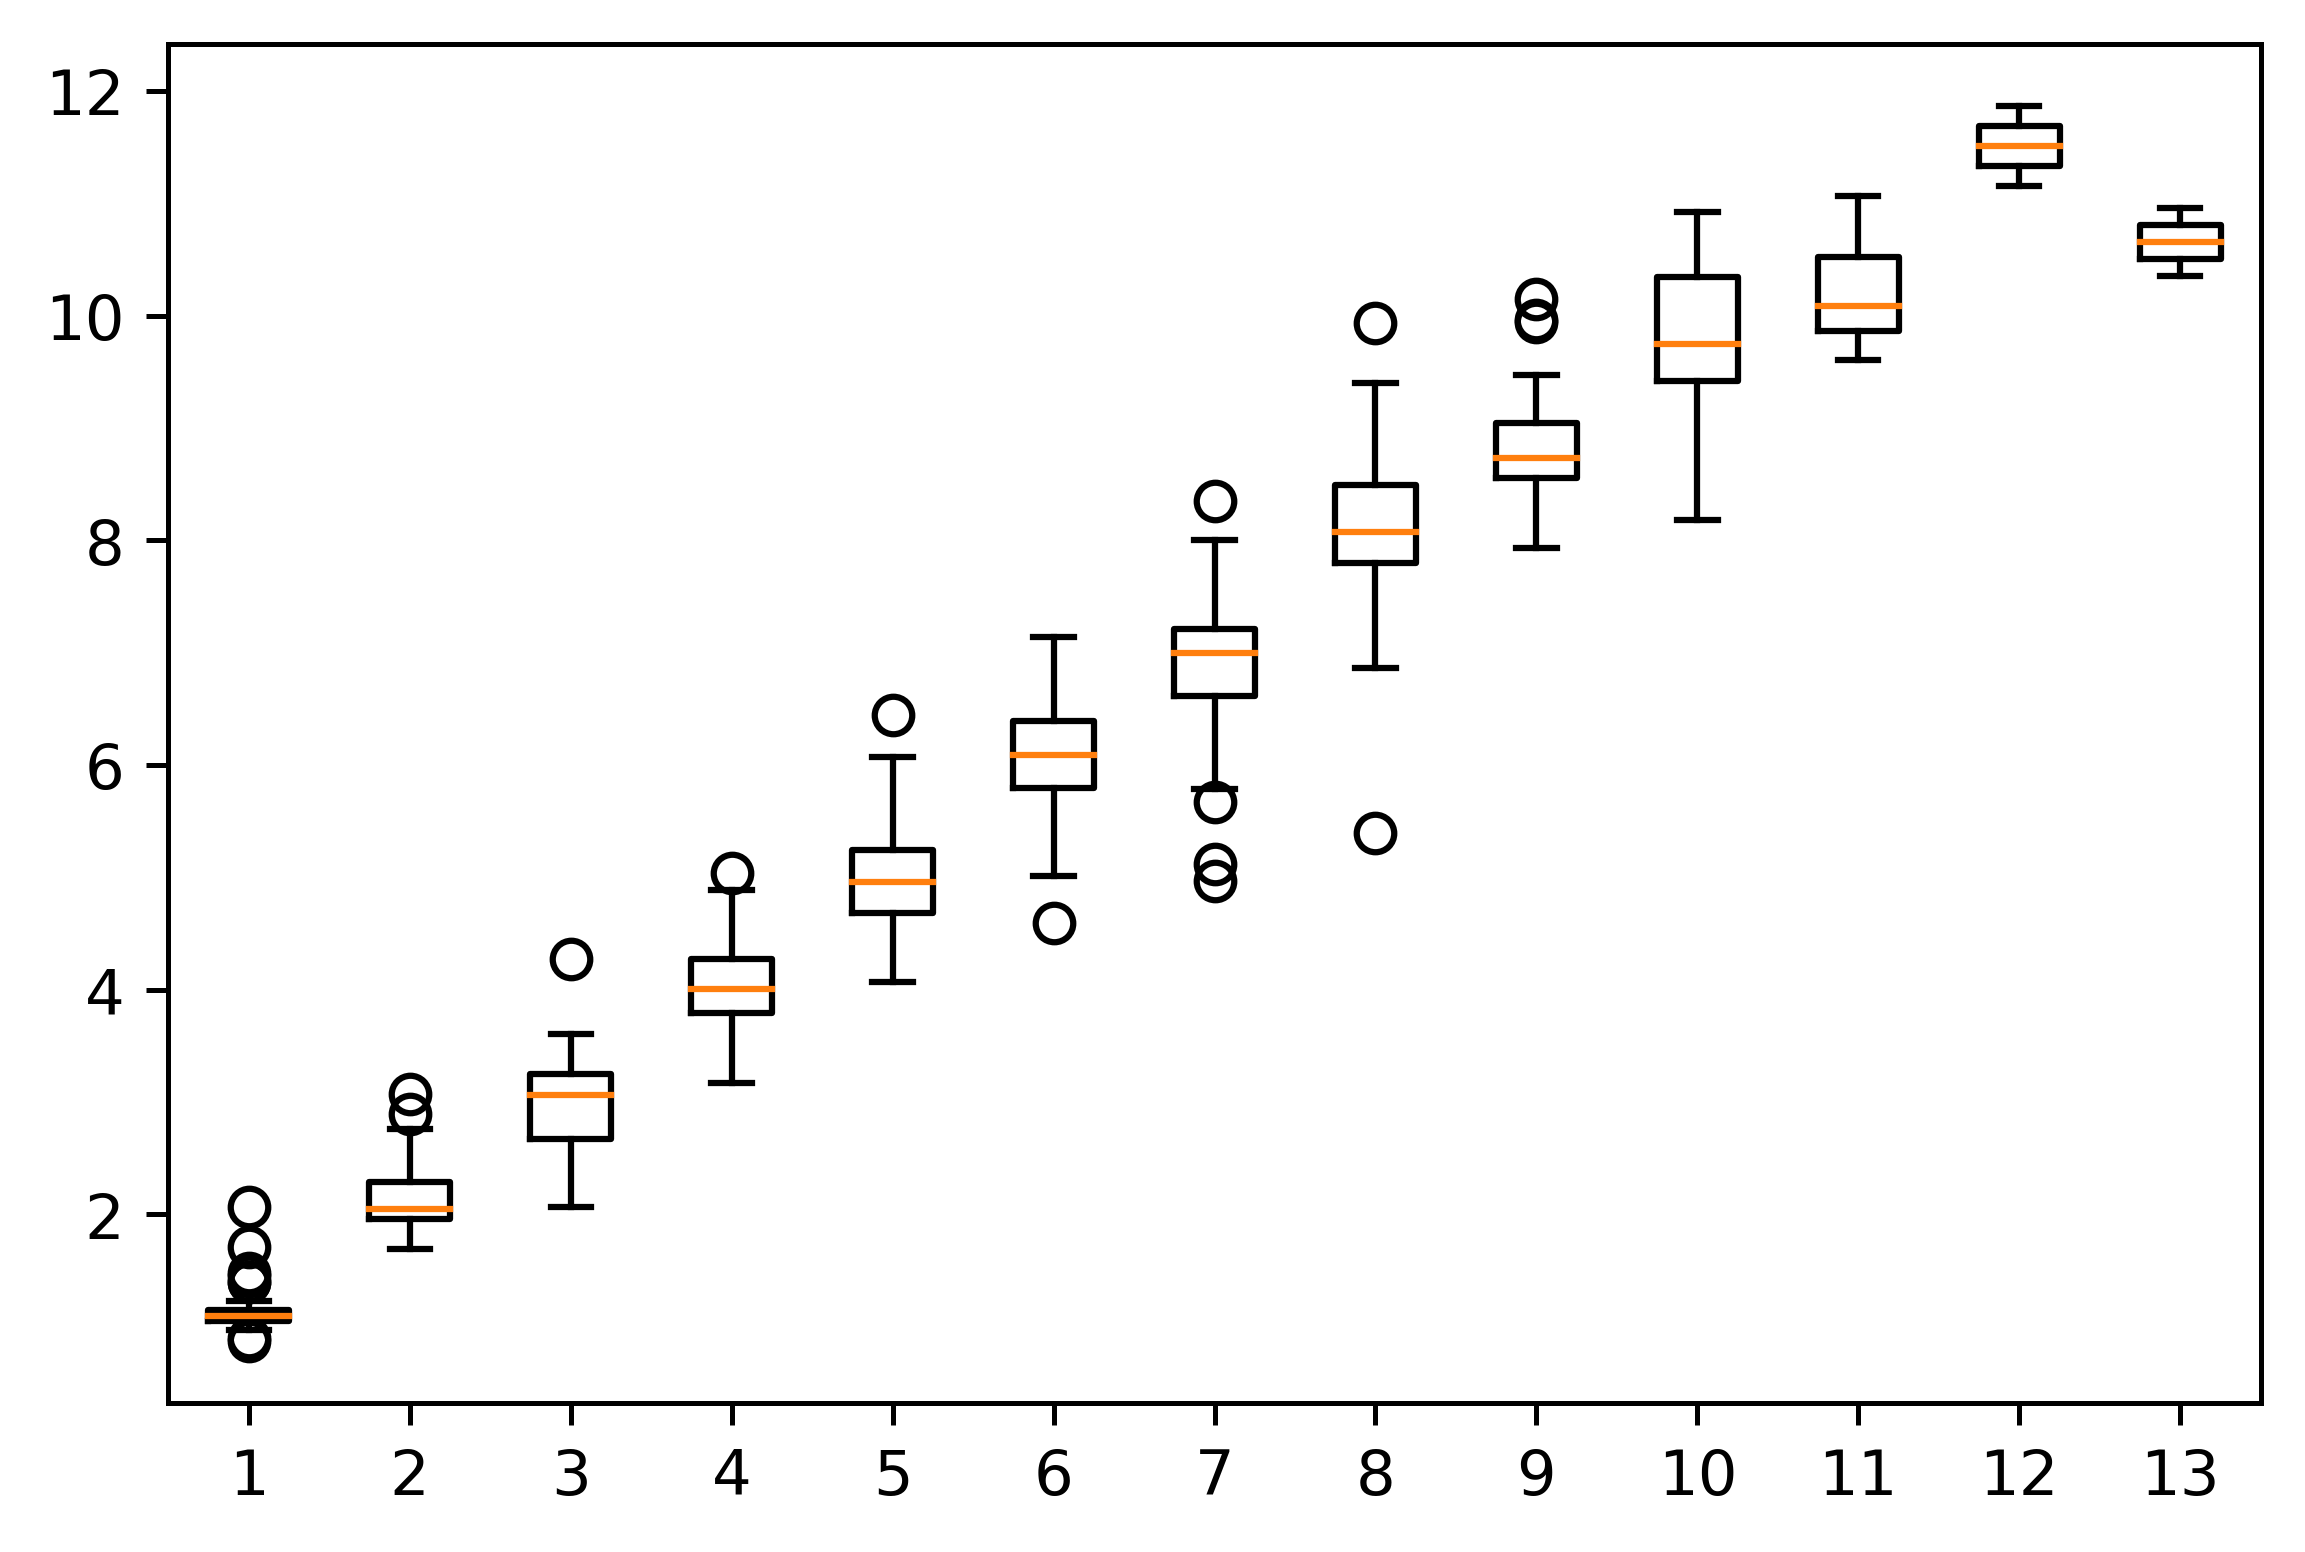

In [3]:
plt.rcParams['figure.dpi'] = 450
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] )

plt.boxplot(pr_age_group)
plt.show()


### Residual plot per age group

The predictions show heteroskedasticity:
heteroskedasticity happens when the standard deviations of a predicted variable, monitored over different values of an independent variable or as related to prior time periods, are non-constant.

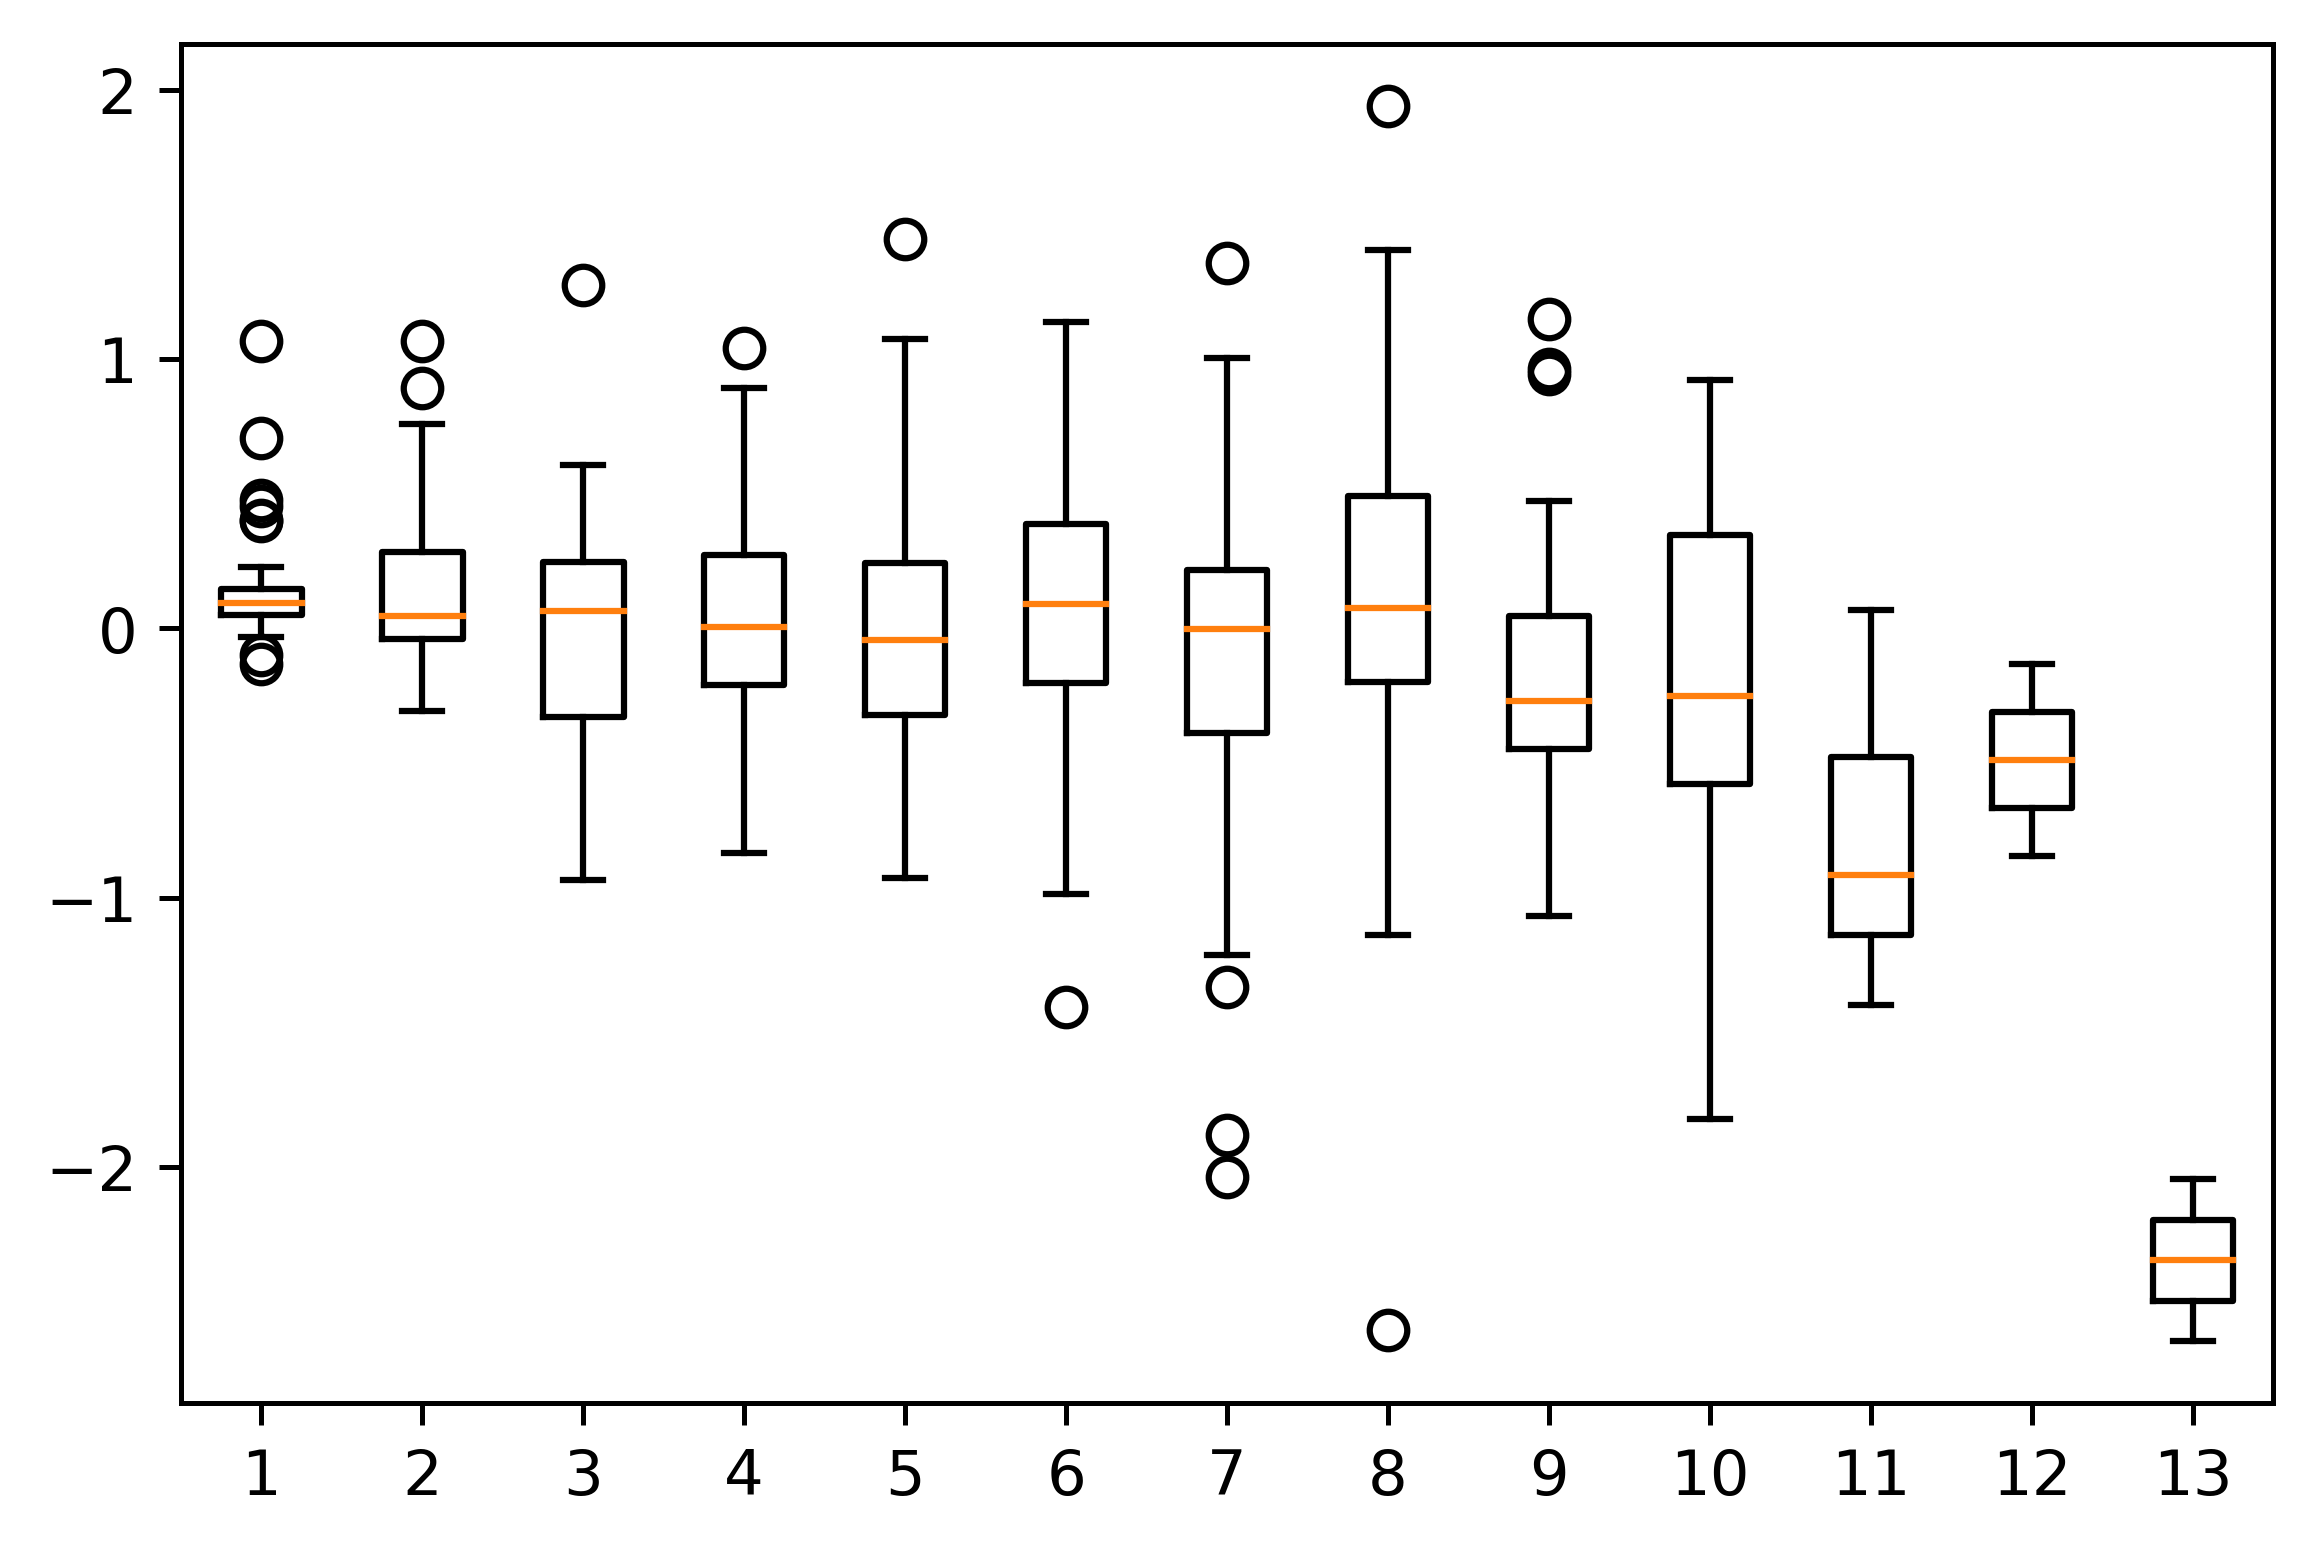

In [4]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] - i )

plt.boxplot(pr_age_group)
plt.show()

### Box plot of mode error summarized over all age groups, and summary statistics

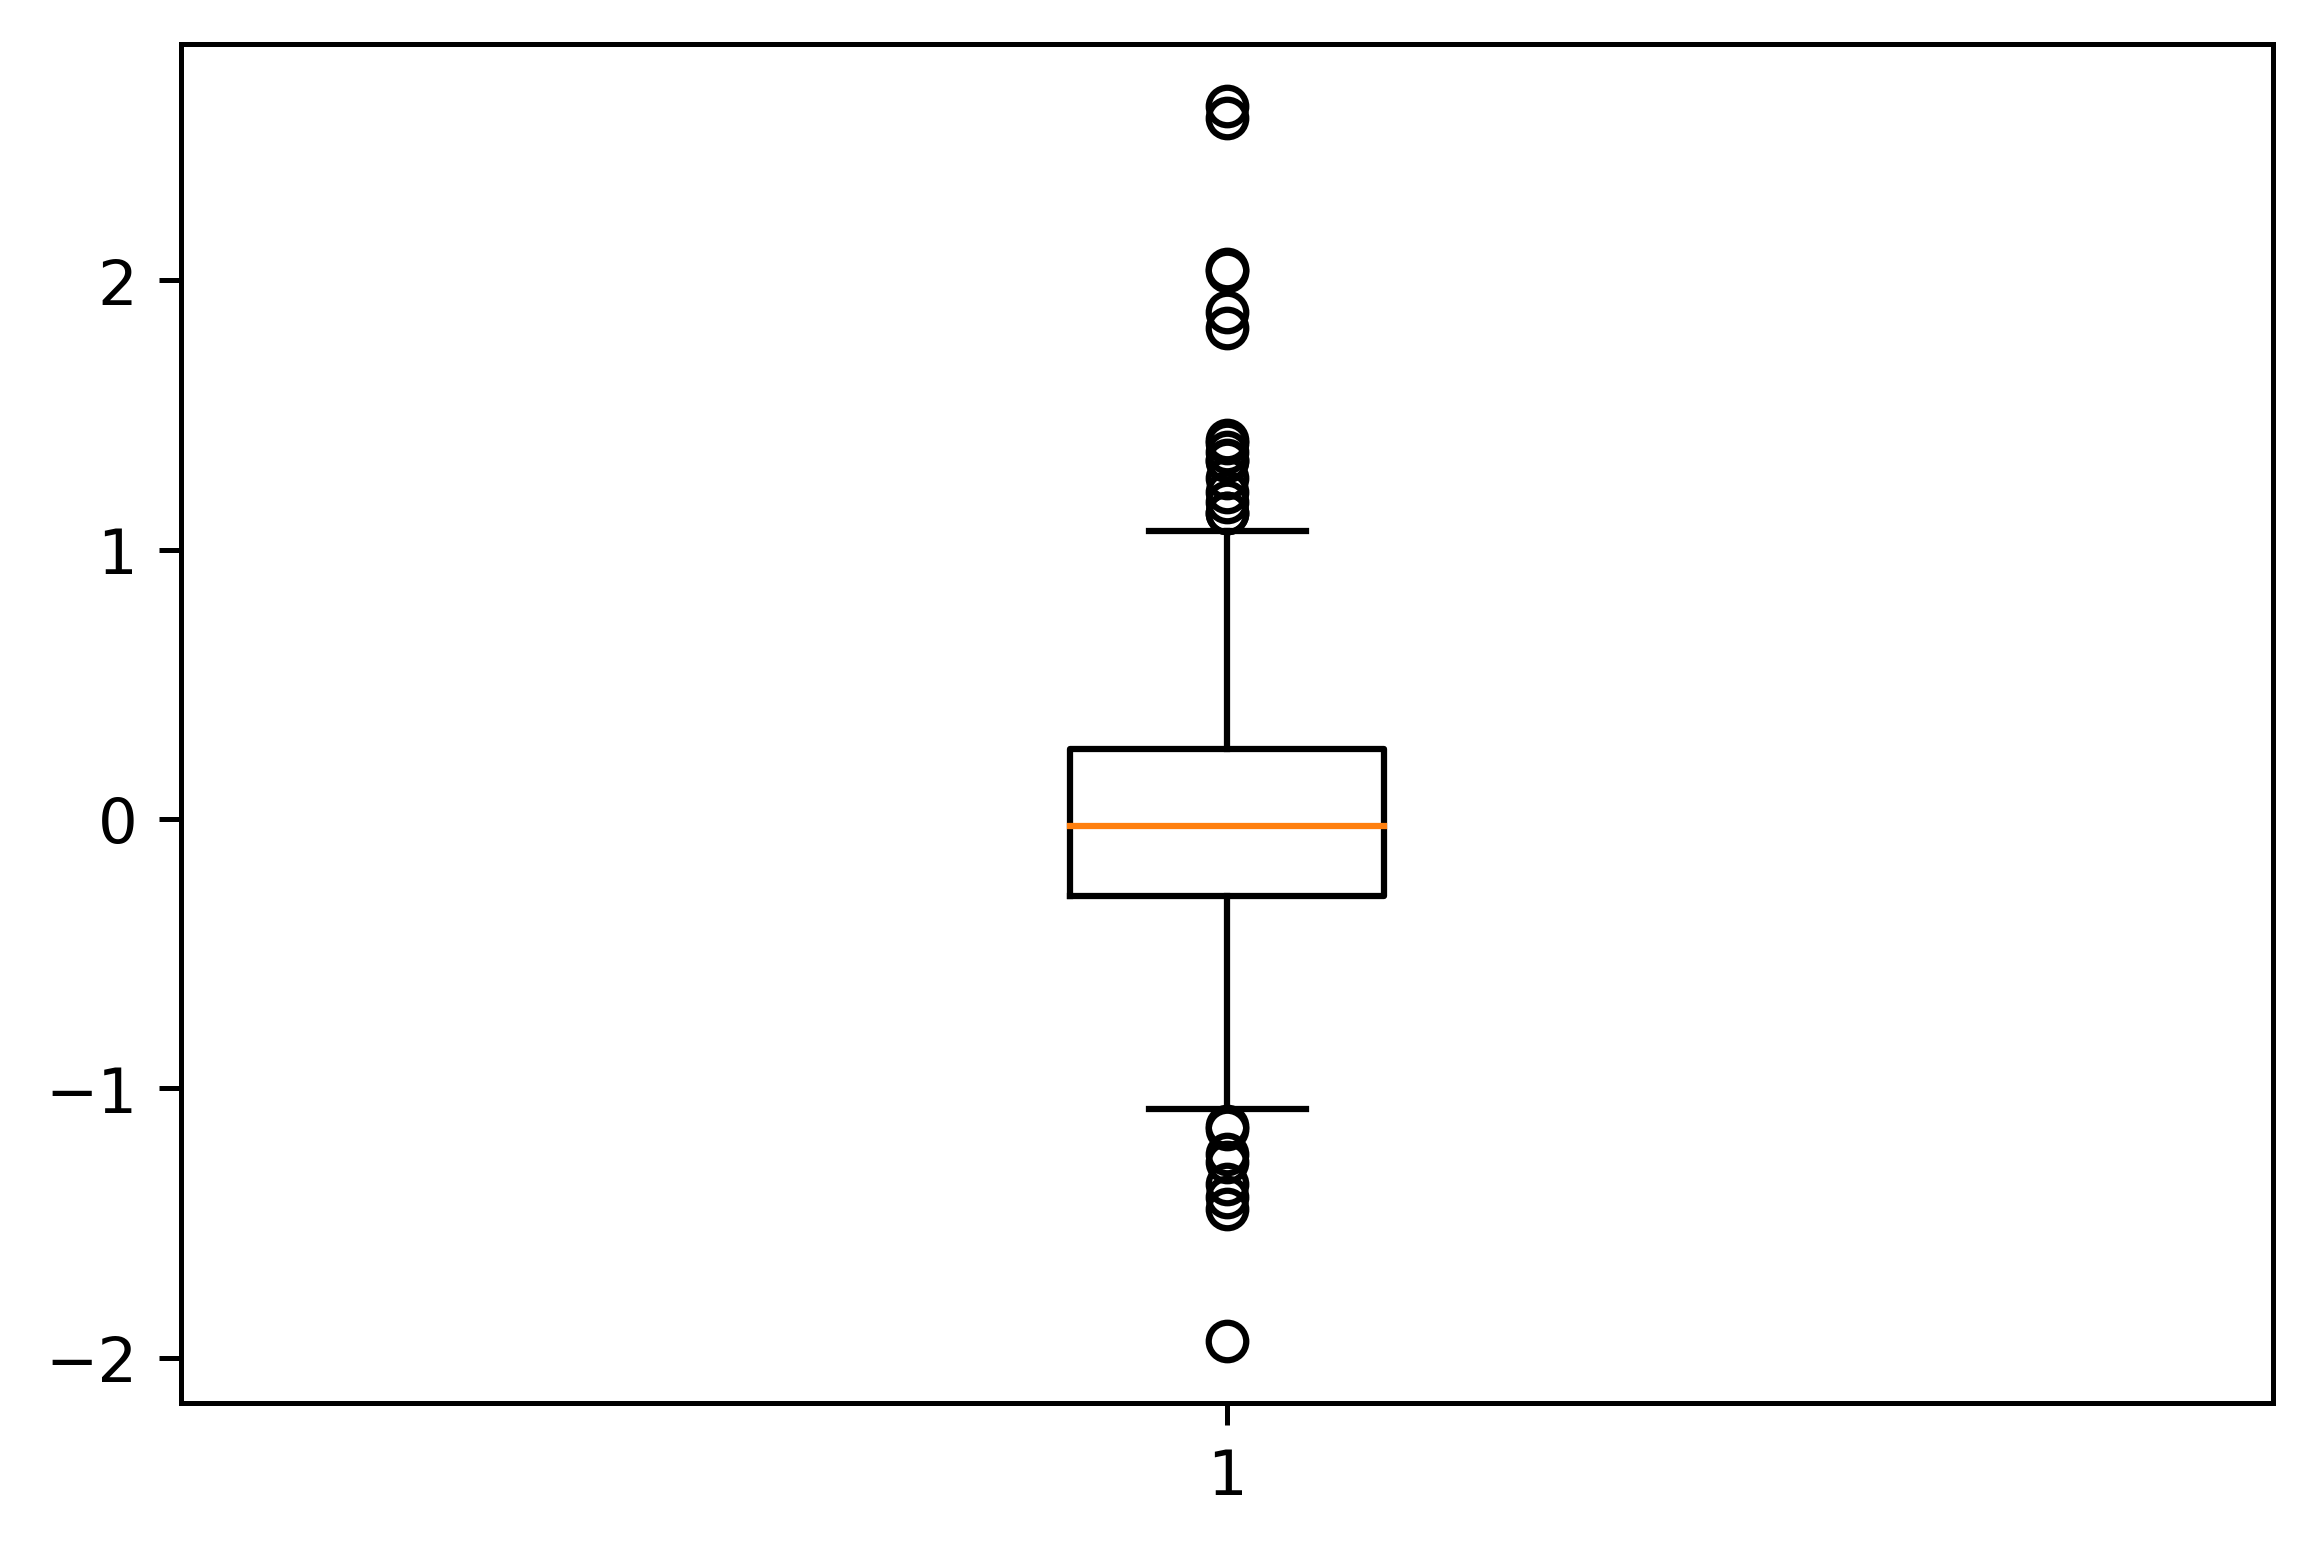

,0
count,515.000000
mean,0.011365
std,0.540606
min,-1.939247
25%,-0.284032
50%,-0.026677
75%,0.259814
max,2.646767


In [5]:
x = y_true.age.values
y = aggregate_pred.values
errors = x-y
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] - i )

plt.boxplot(errors)
plt.show()


df_describe = pd.DataFrame(errors)
df_describe.describe()

### Scatterplot error predictions after rounding

-2.0359066963195804
71
/gpfs/gpfs0/deep/data/Savannah_Professional_Practice2021_08_12_2021/CodOtholiths-MachineLearning/Savannah_Professional_Practice/2014/70111/Nr12_age07/IMG_0229.JPG
-1.880846309661865
362
/gpfs/gpfs0/deep/data/Savannah_Professional_Practice2021_08_12_2021/CodOtholiths-MachineLearning/Savannah_Professional_Practice/2016/70077/Nr06_age07/IMG_0367.JPG
1.9392471313476562
279
/gpfs/gpfs0/deep/data/Savannah_Professional_Practice2021_08_12_2021/CodOtholiths-MachineLearning/Savannah_Professional_Practice/2016/71008/Nr07_age08/IMG_0037.JPG
-2.602426767349243
423
/gpfs/gpfs0/deep/data/Savannah_Professional_Practice2021_08_12_2021/CodOtholiths-MachineLearning/Savannah_Professional_Practice/2015/70014/Nr01_age08/IMG_0001.JPG
-1.8215097904205315
369
/gpfs/gpfs0/deep/data/Savannah_Professional_Practice2021_08_12_2021/CodOtholiths-MachineLearning/Savannah_Professional_Practice/2018/71016/Nr05_age10/IMG_0121.JPG
-2.043622398376465
92
/gpfs/gpfs0/deep/data/Savannah_Professional_Pra

errors in [0.5, 1.5):  135
errors in [1.5, \inf): 7
Total missclassification errors:142


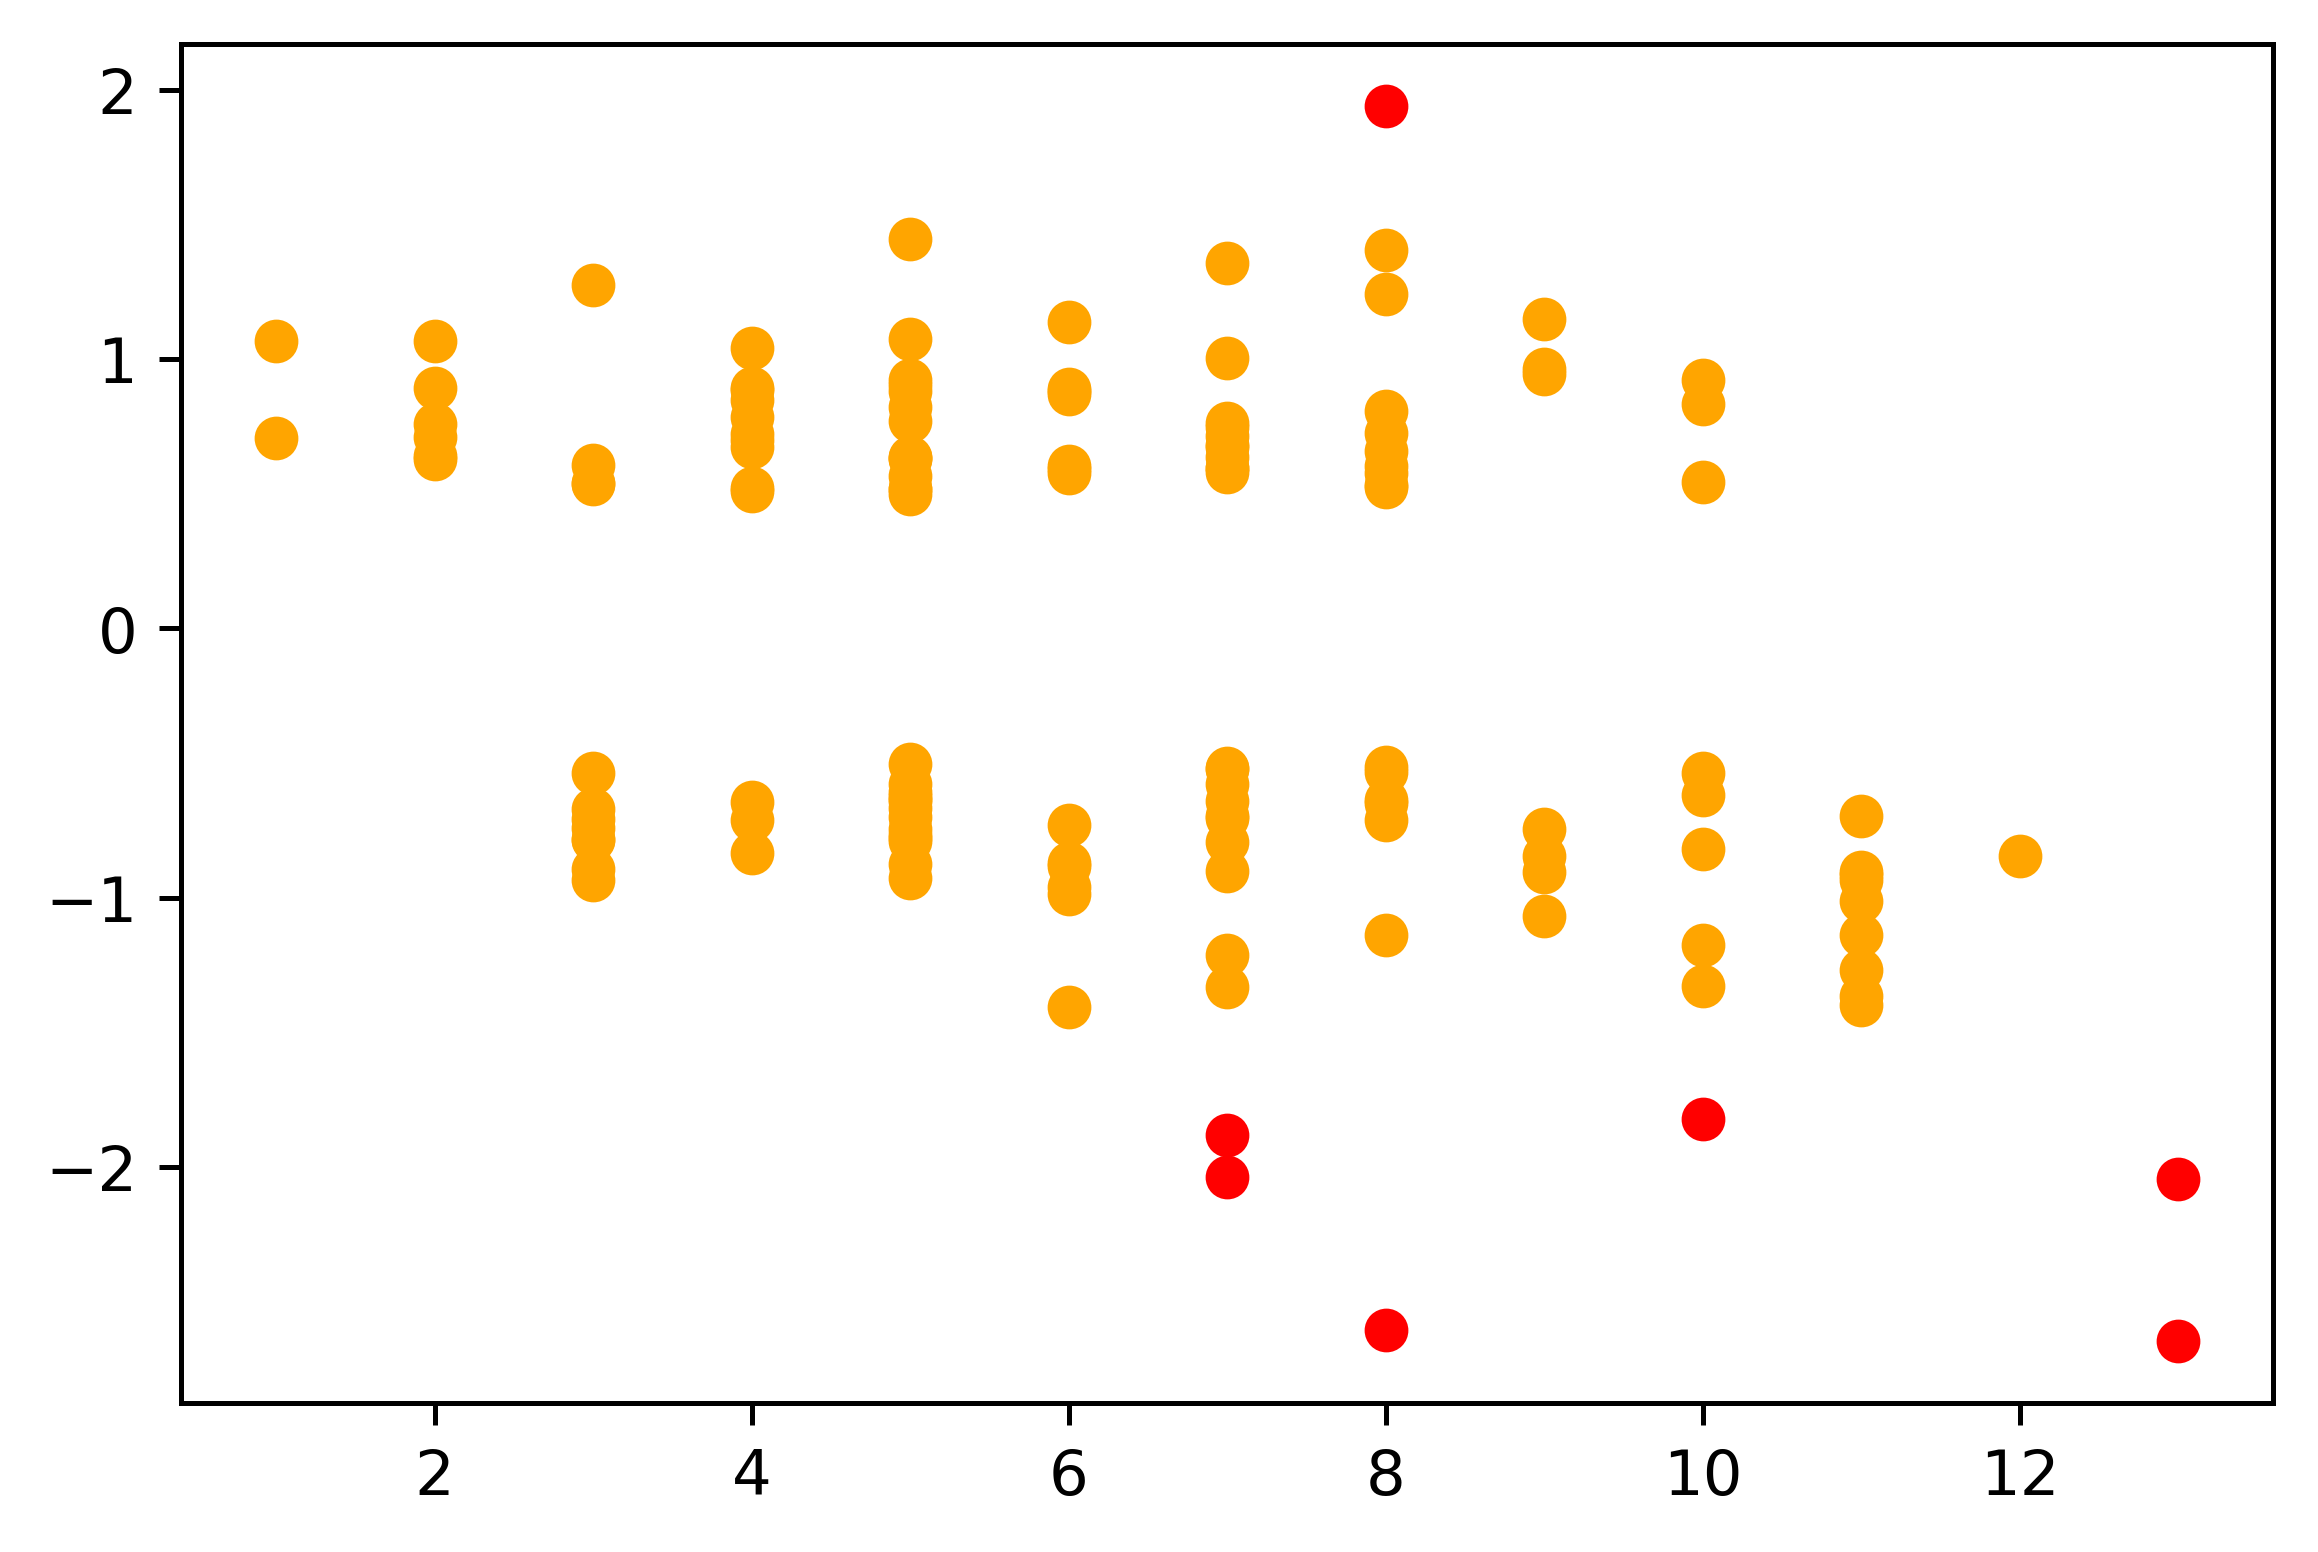

In [6]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
all_rounding_err1 = []
all_rounding_err2 = []
for i in age_range:
    age_idx = np.where(x == i)
    errors = y[age_idx] - i
    errors1 = errors[(np.abs(errors) >= 0.5) & (np.abs(errors) < 1.5)]
    x_axis = [i]*len(errors1)
    plt.scatter(x_axis, errors1, color="orange")
    
    errors2 = errors[np.abs(errors) >= 1.5 ]
    x_axis = [i]*len(errors2)
    plt.scatter(x_axis, errors2, color="red")
    all_rounding_err1.append(errors1)
    all_rounding_err2.append(errors2)
    

flat_list = [item for sublist in all_rounding_err1 for item in sublist]   
oneError = len(flat_list)
print("errors in [0.5, 1.5):  "+ str( oneError ) )

flat_list = [item for sublist in all_rounding_err2 for item in sublist]    
twoOrMore = len(flat_list)
print("errors in [1.5, \inf): "+ str( twoOrMore ) )
print("Total missclassification errors:"+str(oneError+twoOrMore))

plt.show()


### Excluding min/max prediction by fold pr prediction

In [97]:
all_preds = pd.DataFrame()
for i in range(1,10):
  all_preds[str(i)] = fold_preds[str(i)]

all_preds.head()
all_preds['new_pred'] =0.0
for index, row in all_preds.iterrows():
    mask = np.logical_or(row == row.max(), row == row.min())
    #print(mask)
    #print(row)
    row_masked = np.ma.masked_array(row, mask = mask)
    #print(row_masked)
    all_preds['new_pred'].iloc[index] = row_masked.mean()
    
all_preds.head()

print("aggregate accuracy, mse")
print(str( accuracy_score(all_preds.new_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(all_preds.new_pred, y_true.age) ))

aggregate accuracy, mse
0.7242718446601941 0.2952896305252262


In [71]:
```{toggle}

print(pr_age_group[0])
print(np.mean(pr_age_group[0]))
print(np.std(pr_age_group[0]))
print("DDDD")
print(np.percentile(pr_age_group[0], 25) )
print(np.percentile(pr_age_group[0], 50) )
print(np.percentile(pr_age_group[0], 75) )

q1 = np.percentile(pr_age_group[0], 25)
q3 = np.percentile(pr_age_group[0], 75)
print("DDDDDD")
print(len(pr_age_group[0]))
for j in range(len(pr_age_group[0])):
    if pr_age_group[0][j] < q1 or pr_age_group[0][j] > q3:
        print(pr_age_group[0][j])
        
```        

SyntaxError: invalid syntax (<ipython-input-71-e0fdfa07c007>, line 1)

### Summary over all models

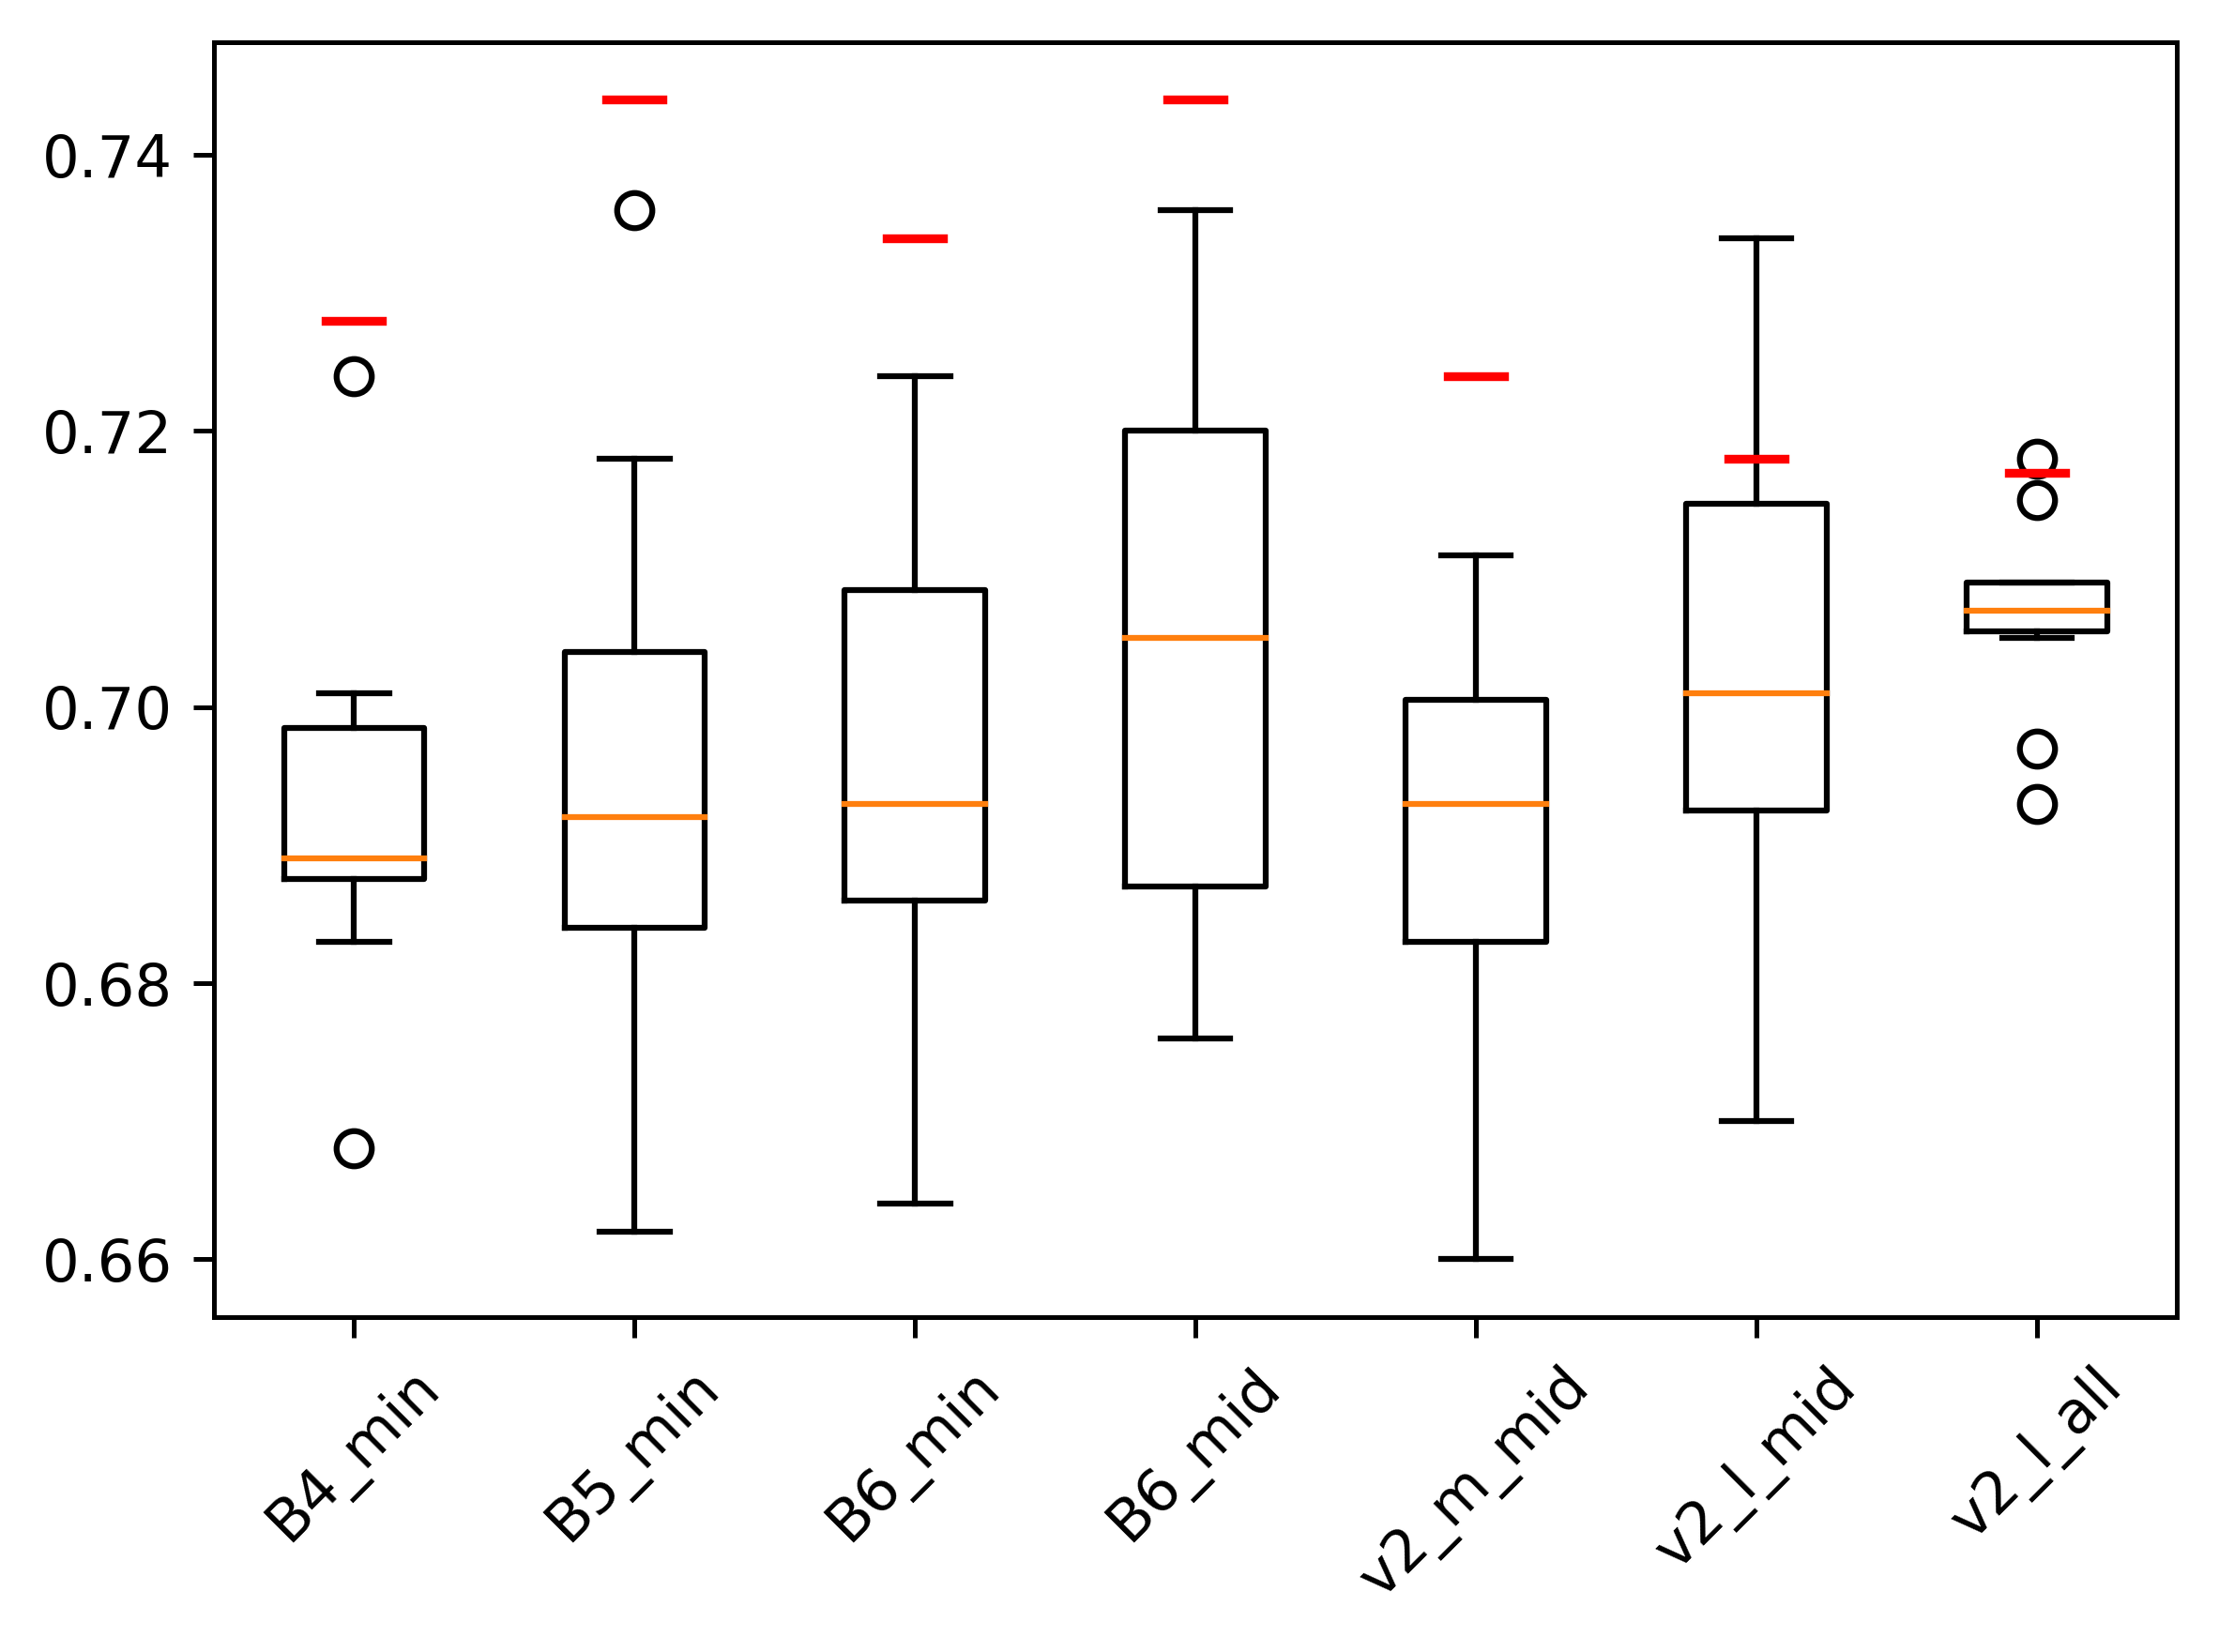

In [38]:
plt.rcParams['figure.dpi'] = 450
v2_m_middle_acc = [0.687,0.676,0.683,0.711,0.701,0.705,0.699,0.683,0.699,0.660]
v2_m_middle_mse = [0.321,0.377,0.332,0.285,0.285,0.325,0.311,0.348,0.295,0.373,]
v2_m_middle_mean_mse =0.292 
v2_m_middle_mean_acc = 0.724

v2_l_middle_acc = [0.697,0.734,0.691,0.670,0.718,0.699,0.726,0.682,0.705,0.703]
v2_l_middle_mse = [0.301,0.281,0.299,0.318,0.282,0.305,0.280,0.334,0.300,0.310,]
v2_l_middle_mean_mse =  0.280
v2_l_middle_mean_acc = 0.718

v2_l_all_acc = [0.709,0.707,0.705,0.707,0.715,0.693,0.707,0.718,0.697,0.709,]
v2_l_all_mse = [0.292,0.289,0.289,0.326,0.307,0.327,0.283,0.29997,0.335,0.295,]
v2_l_all_mean_mse =  0.281
v2_l_all_mean_acc = 0.717

b4_min_acc = [0.699,0.689,0.687,0.683,0.689,0.701,0.697,0.668,0.689,0.724]
b4_min_mse = [0.320,0.318,0.306,0.313,0.322,0.314,0.315,0.316,0.306,0.302]
b4_min_mean_mse = 0.277
b4_min_mean_acc = 0.728

b5_min_acc = [0.718,0.691,0.693,0.668,0.736,0.707,0.662,0.683,0.695,0.687]
b5_min_mse = [0.324,0.322,0.325,0.336,0.291,0.314,0.320,0.331,0.3298,0.317]
b5_min_mean_mse = 0.277
b5_min_mean_acc = 0.744

b6_min_acc = [0.683,0.685,0.664,0.724,0.707,0.709,0.693,0.693,0.720,0.689]
b6_min_mse = [0.325,0.329,0.334,0.293,0.312,0.290,0.320,0.306,0.276,0.300,]
b6_min_mean_mse = 0.272
b6_min_mean_acc = 0.734

b6_middel_acc = [0.685,0.699,0.676,0.736,0.728,0.720,0.680,0.693,0.720,0.711]
b6_middel_mse = [0.323,0.301,0.312,0.268,0.294,0.266,0.309,0.311,0.278,0.289]
b6_middel_mean_mse = 0.262
b6_middel_mean_acc = 0.744


plt.boxplot([b4_min_acc, b5_min_acc, b6_min_acc, b6_middel_acc,v2_m_middle_acc,v2_l_middle_acc, v2_l_all_acc])
plt.plot([0.9, 1.1], [b4_min_mean_acc,b4_min_mean_acc], 'r')
plt.plot([1.9, 2.1], [b5_min_mean_acc,b5_min_mean_acc], 'r')
plt.plot([2.9, 3.1], [b6_min_mean_acc,b6_min_mean_acc], 'r')
plt.plot([3.9, 4.1], [b6_middel_mean_acc,b6_middel_mean_acc], 'r')
plt.plot([4.9, 5.1], [v2_m_middle_mean_acc,v2_m_middle_mean_acc], 'r')
plt.plot([5.9, 6.1], [v2_l_middle_mean_acc,v2_l_middle_mean_acc], 'r')
plt.plot([6.9, 7.1], [v2_l_all_mean_acc,v2_l_all_mean_acc], 'r')
plt.xticks(range(1,8), ['B4_min', 'B5_min', 'B6_min', 'B6_mid', 'v2_m_mid', 'v2_l_mid', 'v2_l_all'], rotation = 45)

plt.show()


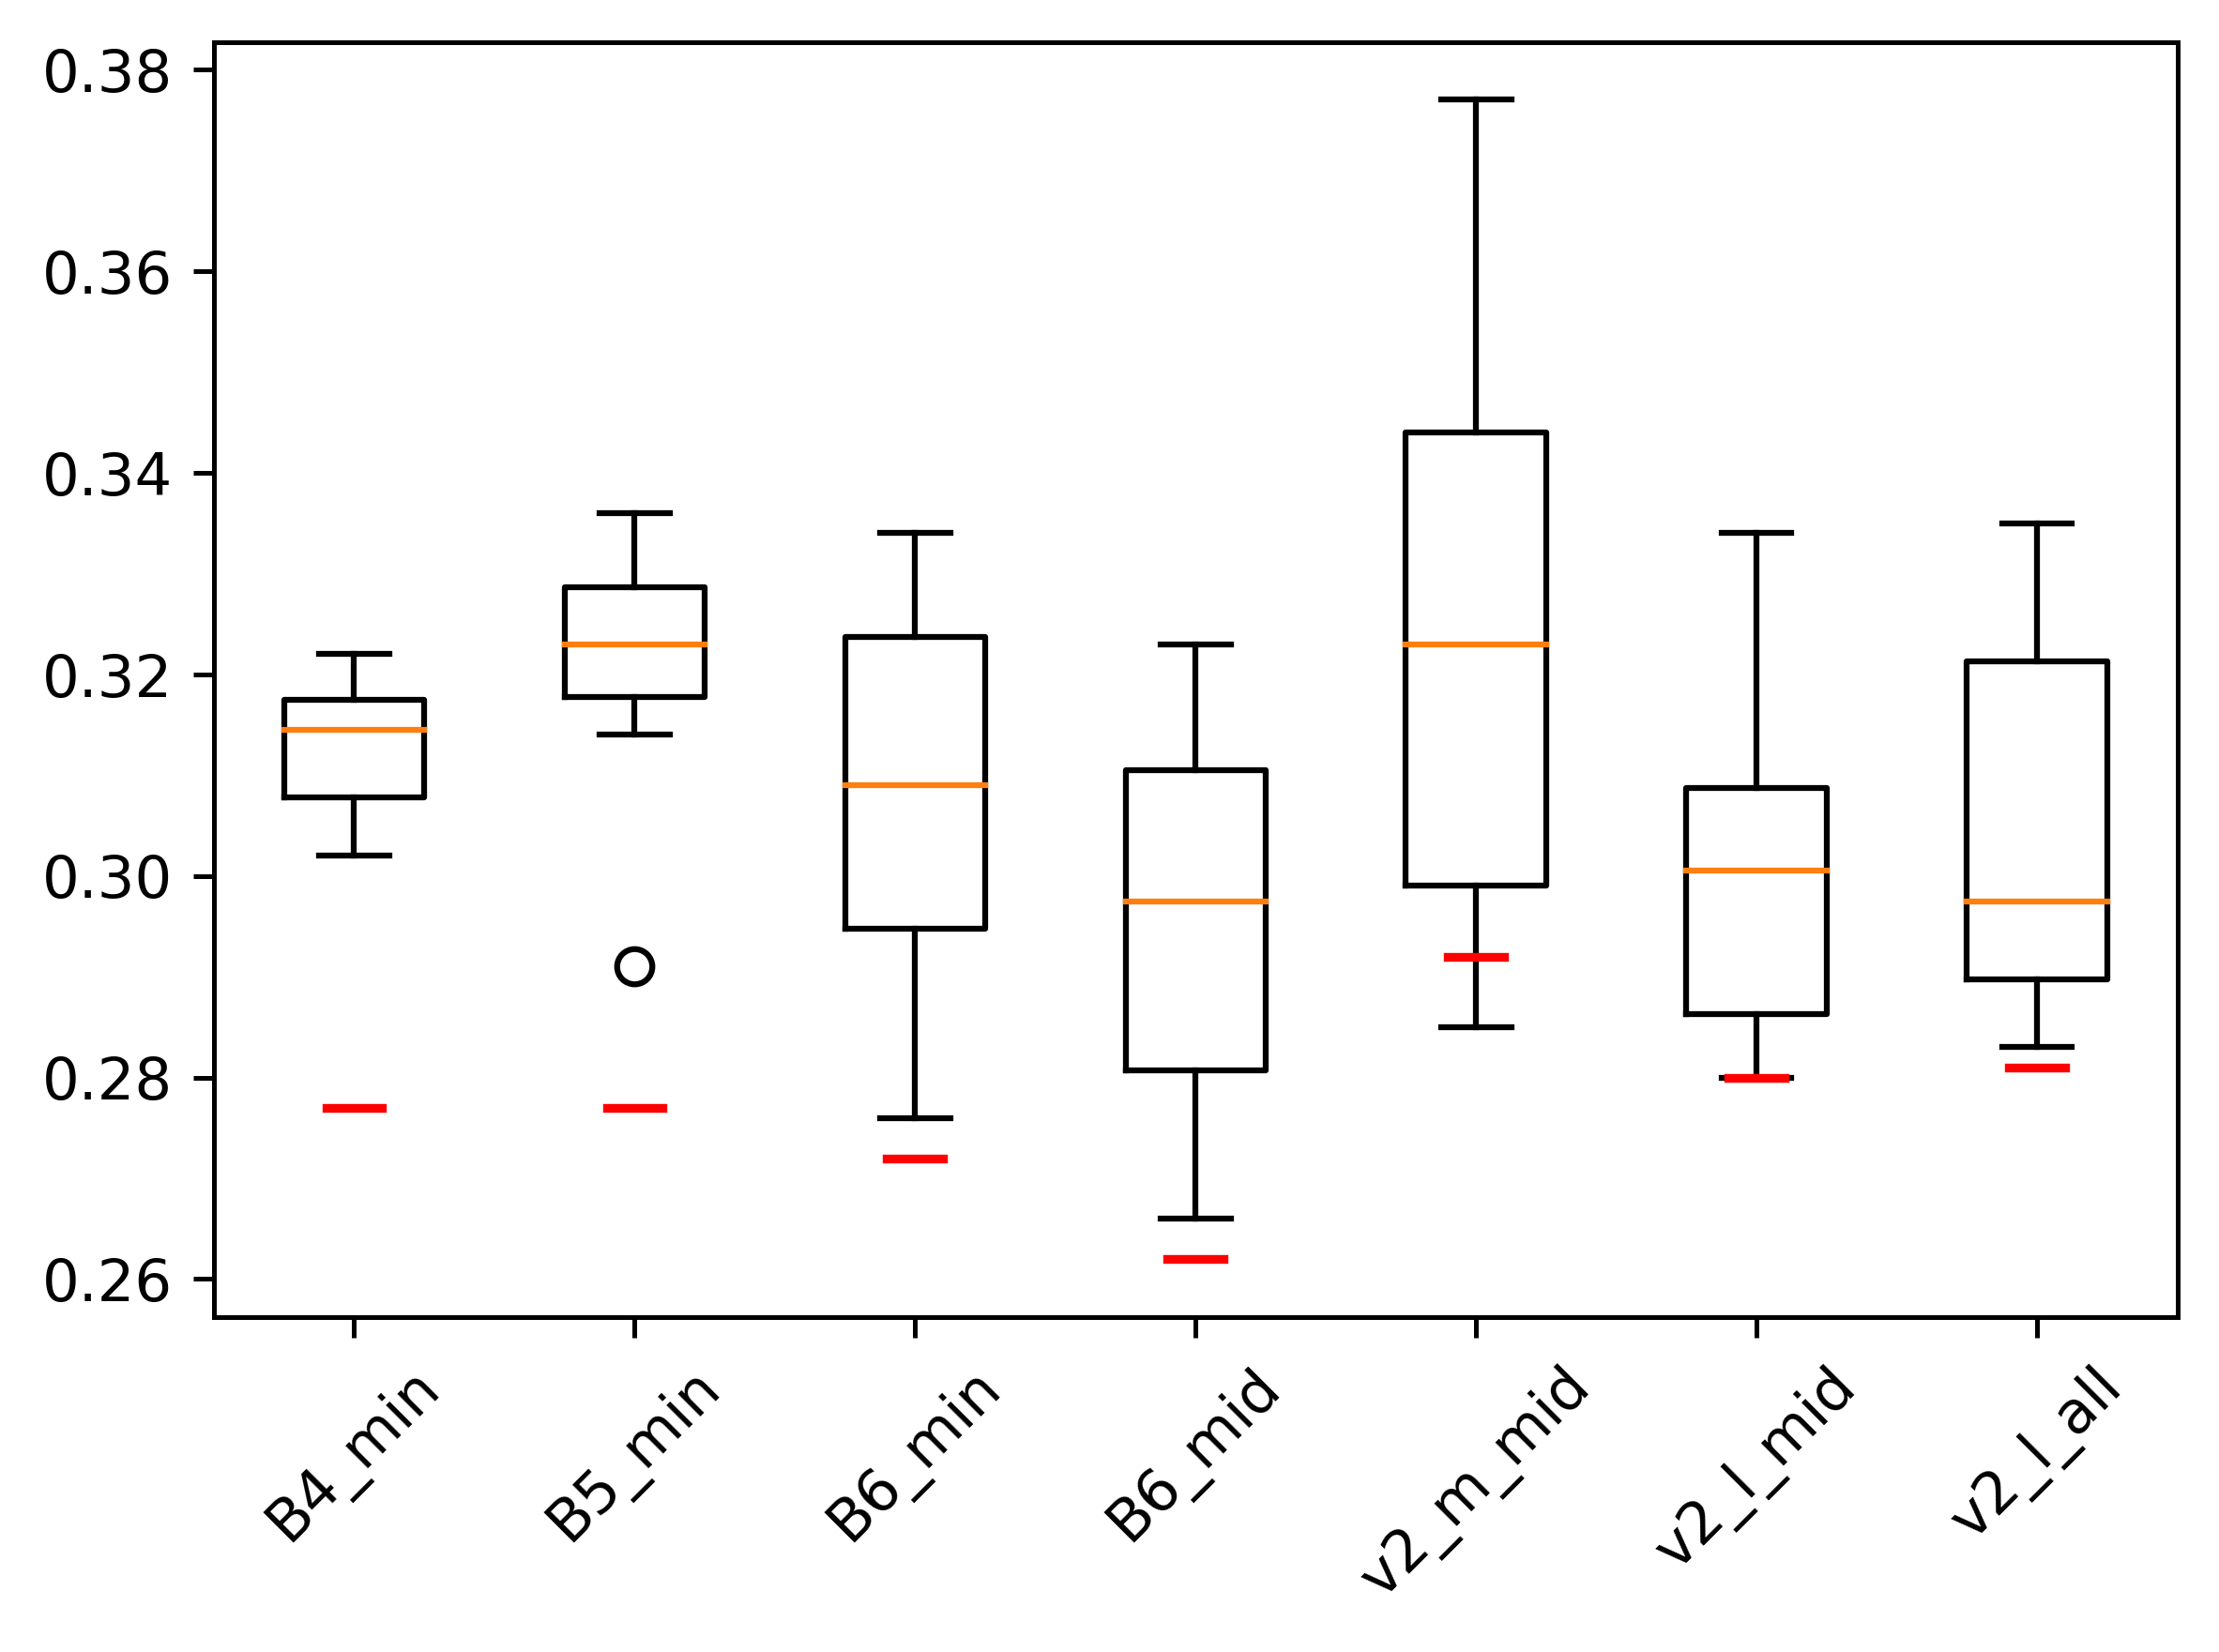

In [43]:
plt.boxplot([b4_min_mse, b5_min_mse, b6_min_mse, b6_middel_mse, v2_m_middle_mse, v2_l_middle_mse, v2_l_all_mse])
plt.plot([0.9, 1.1], [b4_min_mean_mse,b4_min_mean_mse], 'r')
plt.plot([1.9, 2.1], [b5_min_mean_mse,b5_min_mean_mse], 'r')
plt.plot([2.9, 3.1], [b6_min_mean_mse,b6_min_mean_mse], 'r')
plt.plot([3.9, 4.1], [b6_middel_mean_mse,b6_middel_mean_mse], 'r')
plt.plot([4.9, 5.1], [v2_m_middle_mean_mse,v2_m_middle_mean_mse], 'r')
plt.plot([5.9, 6.1], [v2_l_middle_mean_mse,v2_l_middle_mean_mse], 'r')
plt.plot([6.9, 7.1], [v2_l_all_mean_mse,v2_l_all_mean_mse], 'r')
plt.xticks(range(1,8), ['B4_min', 'B5_min', 'B6_min', 'B6_mid', 'v2_m_mid', 'v2_l_mid', 'v2_l_all'], rotation = 45)

plt.show()

### Outliers >= 1.5 years

In [28]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
for i in age_range:
    age_idx = np.where(x == i)
    for j in age_idx[0]:
        if np.abs( y[ j ] - i ) >= 1.5:
            print(str(y[j])+" "+str(i), end=',')
            print(j)
            #print(y_true.iloc[j].path)

4.96409330368042 7,71
5.119153690338135 7,362
9.939247131347656 8,279
5.397573232650757 8,423
8.178490209579468 10,369
10.956377601623535 13,92
10.353233051300048 13,342


### Ensemble of ensemble

In [22]:
v2_m = pd.read_csv("preds.csv") #EfficientNetV2 Medium 
v2_l = pd.read_csv("../EFFNetV2_l_MLP_all/preds.csv") 
v2_l = pd.read_csv("../EFFNetV2_l_MLP_all/preds.csv") #EfficientNetV2 large 

b4 = [None] * 10
for i in range(0,10):
  b4[i] = pd.read_csv("../tf_EFFNetB4_groupkfold_stdScalar_10_test2/test_set_"+str(i)+".csv")

b5 = [None] * 10
for i in range(0,10):
  b5[i] = pd.read_csv("../tf_EFFNetB5_2_groupkfold_stdScalar_10_test_min/test_set_"+str(i)+".csv")

b6 = [None] * 10
for i in range(0,10):
  b6[i] = pd.read_csv("../tf_EFFNetB6_groupkfold_stdScalar_10_test_min/test_set_"+str(i)+".csv")

y_true = pd.read_csv("test_set_files.csv") 

a_v2_m = v2_m['0']
for i in range(1,10):
  a_v2_m += v2_m[str(i)]

a_v2_l = v2_l['0']
for i in range(1,10):
  a_v2_l += v2_l[str(i)]

a_b4 = b4[0].y_pred_test
for i in range(1,10):
  a_b4 += b4[i].y_pred_test

a_b5 = b5[0].y_pred_test
for i in range(1,10):
  a_b5 += b5[i].y_pred_test

a_b6 = b6[0].y_pred_test
for i in range(1,10):
  a_b6 += b6[i].y_pred_test

### ALL ###
aggregate = (a_v2_m+a_v2_l+a_b4+a_b5+a_b6)/50.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

# Tuple ensembles:


aggregate accuracy, mse
0.7592233009708738 0.24691604506270654


### Tuples

In [23]:
#a_v2_m+a_v2_l+a_b4+a_b5+a_b6
aggregate = (a_v2_m+a_v2_l)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_m+a_b4)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_m+a_b5)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_m+a_b6)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_l+a_b4)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_l+a_b5)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_l+a_b6)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_b4+a_b5)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_b5+a_b6)/20.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate accuracy, mse
0.7320388349514563 0.277822337781777
aggregate accuracy, mse
0.7495145631067961 0.258894130258316
aggregate accuracy, mse
0.7533980582524272 0.25843597961950937
aggregate accuracy, mse
0.7398058252427184 0.25559626301886595
aggregate accuracy, mse
0.7495145631067961 0.25495993151603163
aggregate accuracy, mse
0.7456310679611651 0.2556596335513578
aggregate accuracy, mse
0.7320388349514563 0.25277541939421394
aggregate accuracy, mse
0.7436893203883496 0.26298471668733503
aggregate accuracy, mse
0.7514563106796116 0.2578466383988798


### Triplets

In [24]:
#a_v2_m+a_v2_l+a_b4+a_b5+a_b6
aggregate = (a_v2_m+a_v2_l+a_b4)/30.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_m+a_v2_l+a_b5)/30.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_m+a_v2_l+a_b6)/30.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_l+a_b4+a_b5)/30.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_l+a_b4+a_b6)/30.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_b4+a_b5+a_b6)/30.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate accuracy, mse
0.7553398058252427 0.25742795432279
aggregate accuracy, mse
0.7475728155339806 0.25750847552612505
aggregate accuracy, mse
0.7456310679611651 0.2555029147518433
aggregate accuracy, mse
0.7533980582524272 0.2510403727063409
aggregate accuracy, mse
0.7592233009708738 0.2478727656909754
aggregate accuracy, mse
0.7611650485436893 0.2541651517742738


### Quadruples

In [25]:
#a_v2_m+a_v2_l+a_b4+a_b5+a_b6
aggregate = (a_v2_m+a_v2_l+a_b4+a_b5)/40.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_m+a_v2_l+a_b4+a_b6)/40.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_l+a_b4+a_b5+a_b6)/40.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate = (a_v2_m+a_b4+a_b5+a_b6)/40.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate, y_true.age) ))

aggregate accuracy, mse
0.7631067961165049 0.25133043829815466
aggregate accuracy, mse
0.7572815533980582 0.24914158495576394
aggregate accuracy, mse
0.7631067961165049 0.24703617893261223
aggregate accuracy, mse
0.7689320388349514 0.2480999287149154


### ensemble of ensemble - accuracy

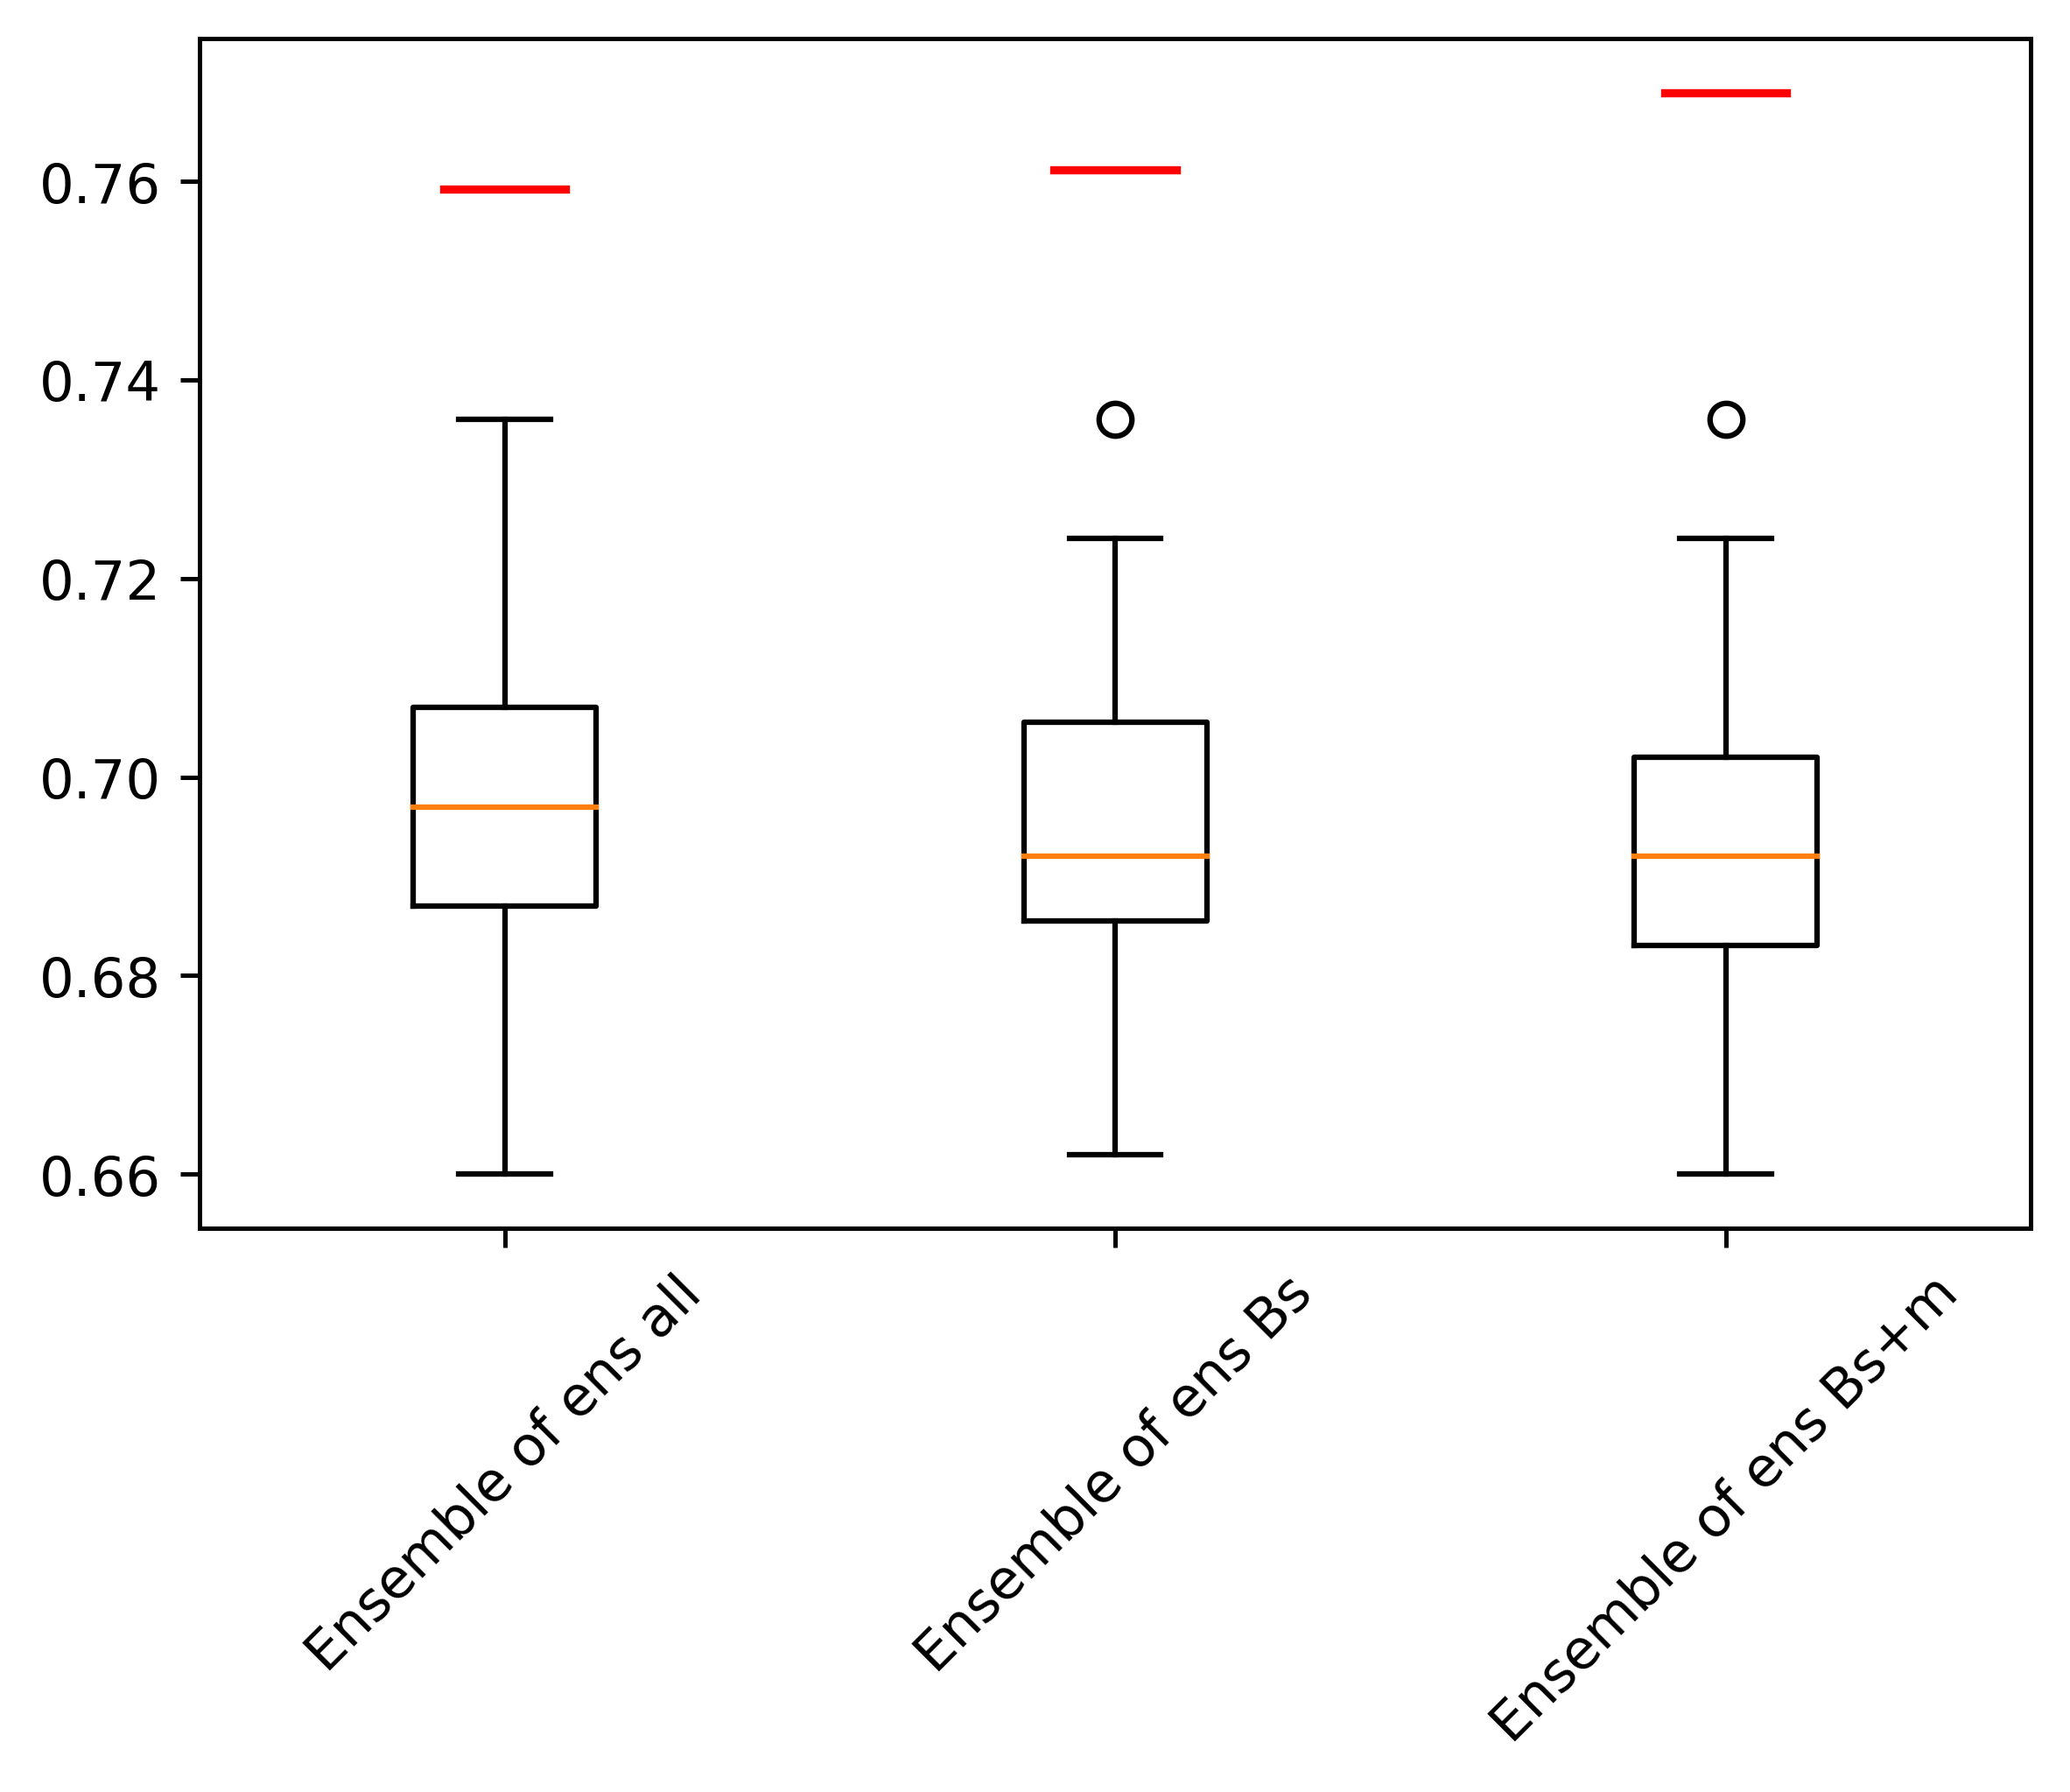

In [30]:
import itertools 

ens_all_acc = 0.7592233009708738
ens_all_mse = 0.24691604506270654

ens_B_acc = 0.7611650485436893
ens_B_mse = 0.2480999287149154

ens_Bm_acc = 0.7689320388349514
ens_Bm_mse = 0.2480999287149154

ens1_acc = itertools.chain(b4_min_acc, b5_min_acc, b6_min_acc, v2_m_middle_acc,v2_l_middle_acc, v2_l_all_acc)
ens1_acc = list(ens1_acc)

ens2_acc = itertools.chain(b4_min_acc, b5_min_acc, b6_min_acc)
ens2_acc = list(ens2_acc)

ens3_acc = itertools.chain(b4_min_acc, b5_min_acc, b6_min_acc, v2_m_middle_acc)
ens3_acc = list(ens3_acc)

ens1_mse = itertools.chain(b4_min_mse, b5_min_mse, b6_min_mse, v2_m_middle_mse,v2_l_middle_mse, v2_l_all_mse)
ens1_mse = list(ens1_mse)

ens2_mse = itertools.chain(b4_min_mse, b5_min_mse, b6_min_mse)
ens2_mse = list(ens2_mse)

ens3_mse = itertools.chain(b4_min_mse, b5_min_mse, b6_min_mse, v2_m_middle_mse)
ens3_mse = list(ens3_mse)

plt.boxplot([ens1_acc, ens2_acc, ens3_acc])
plt.plot([0.9, 1.1], [ens_all_acc,ens_all_acc], 'r')
plt.plot([1.9, 2.1], [ens_B_acc,ens_B_acc], 'r')
plt.plot([2.9, 3.1], [ens_Bm_acc,ens_Bm_acc], 'r')

plt.xticks(range(1,4), ['Ensemble of ens all', 'Ensemble of ens Bs', 'Ensemble of ens Bs+m'], rotation = 45)

plt.show()

### ensemble of ensemble - MSE

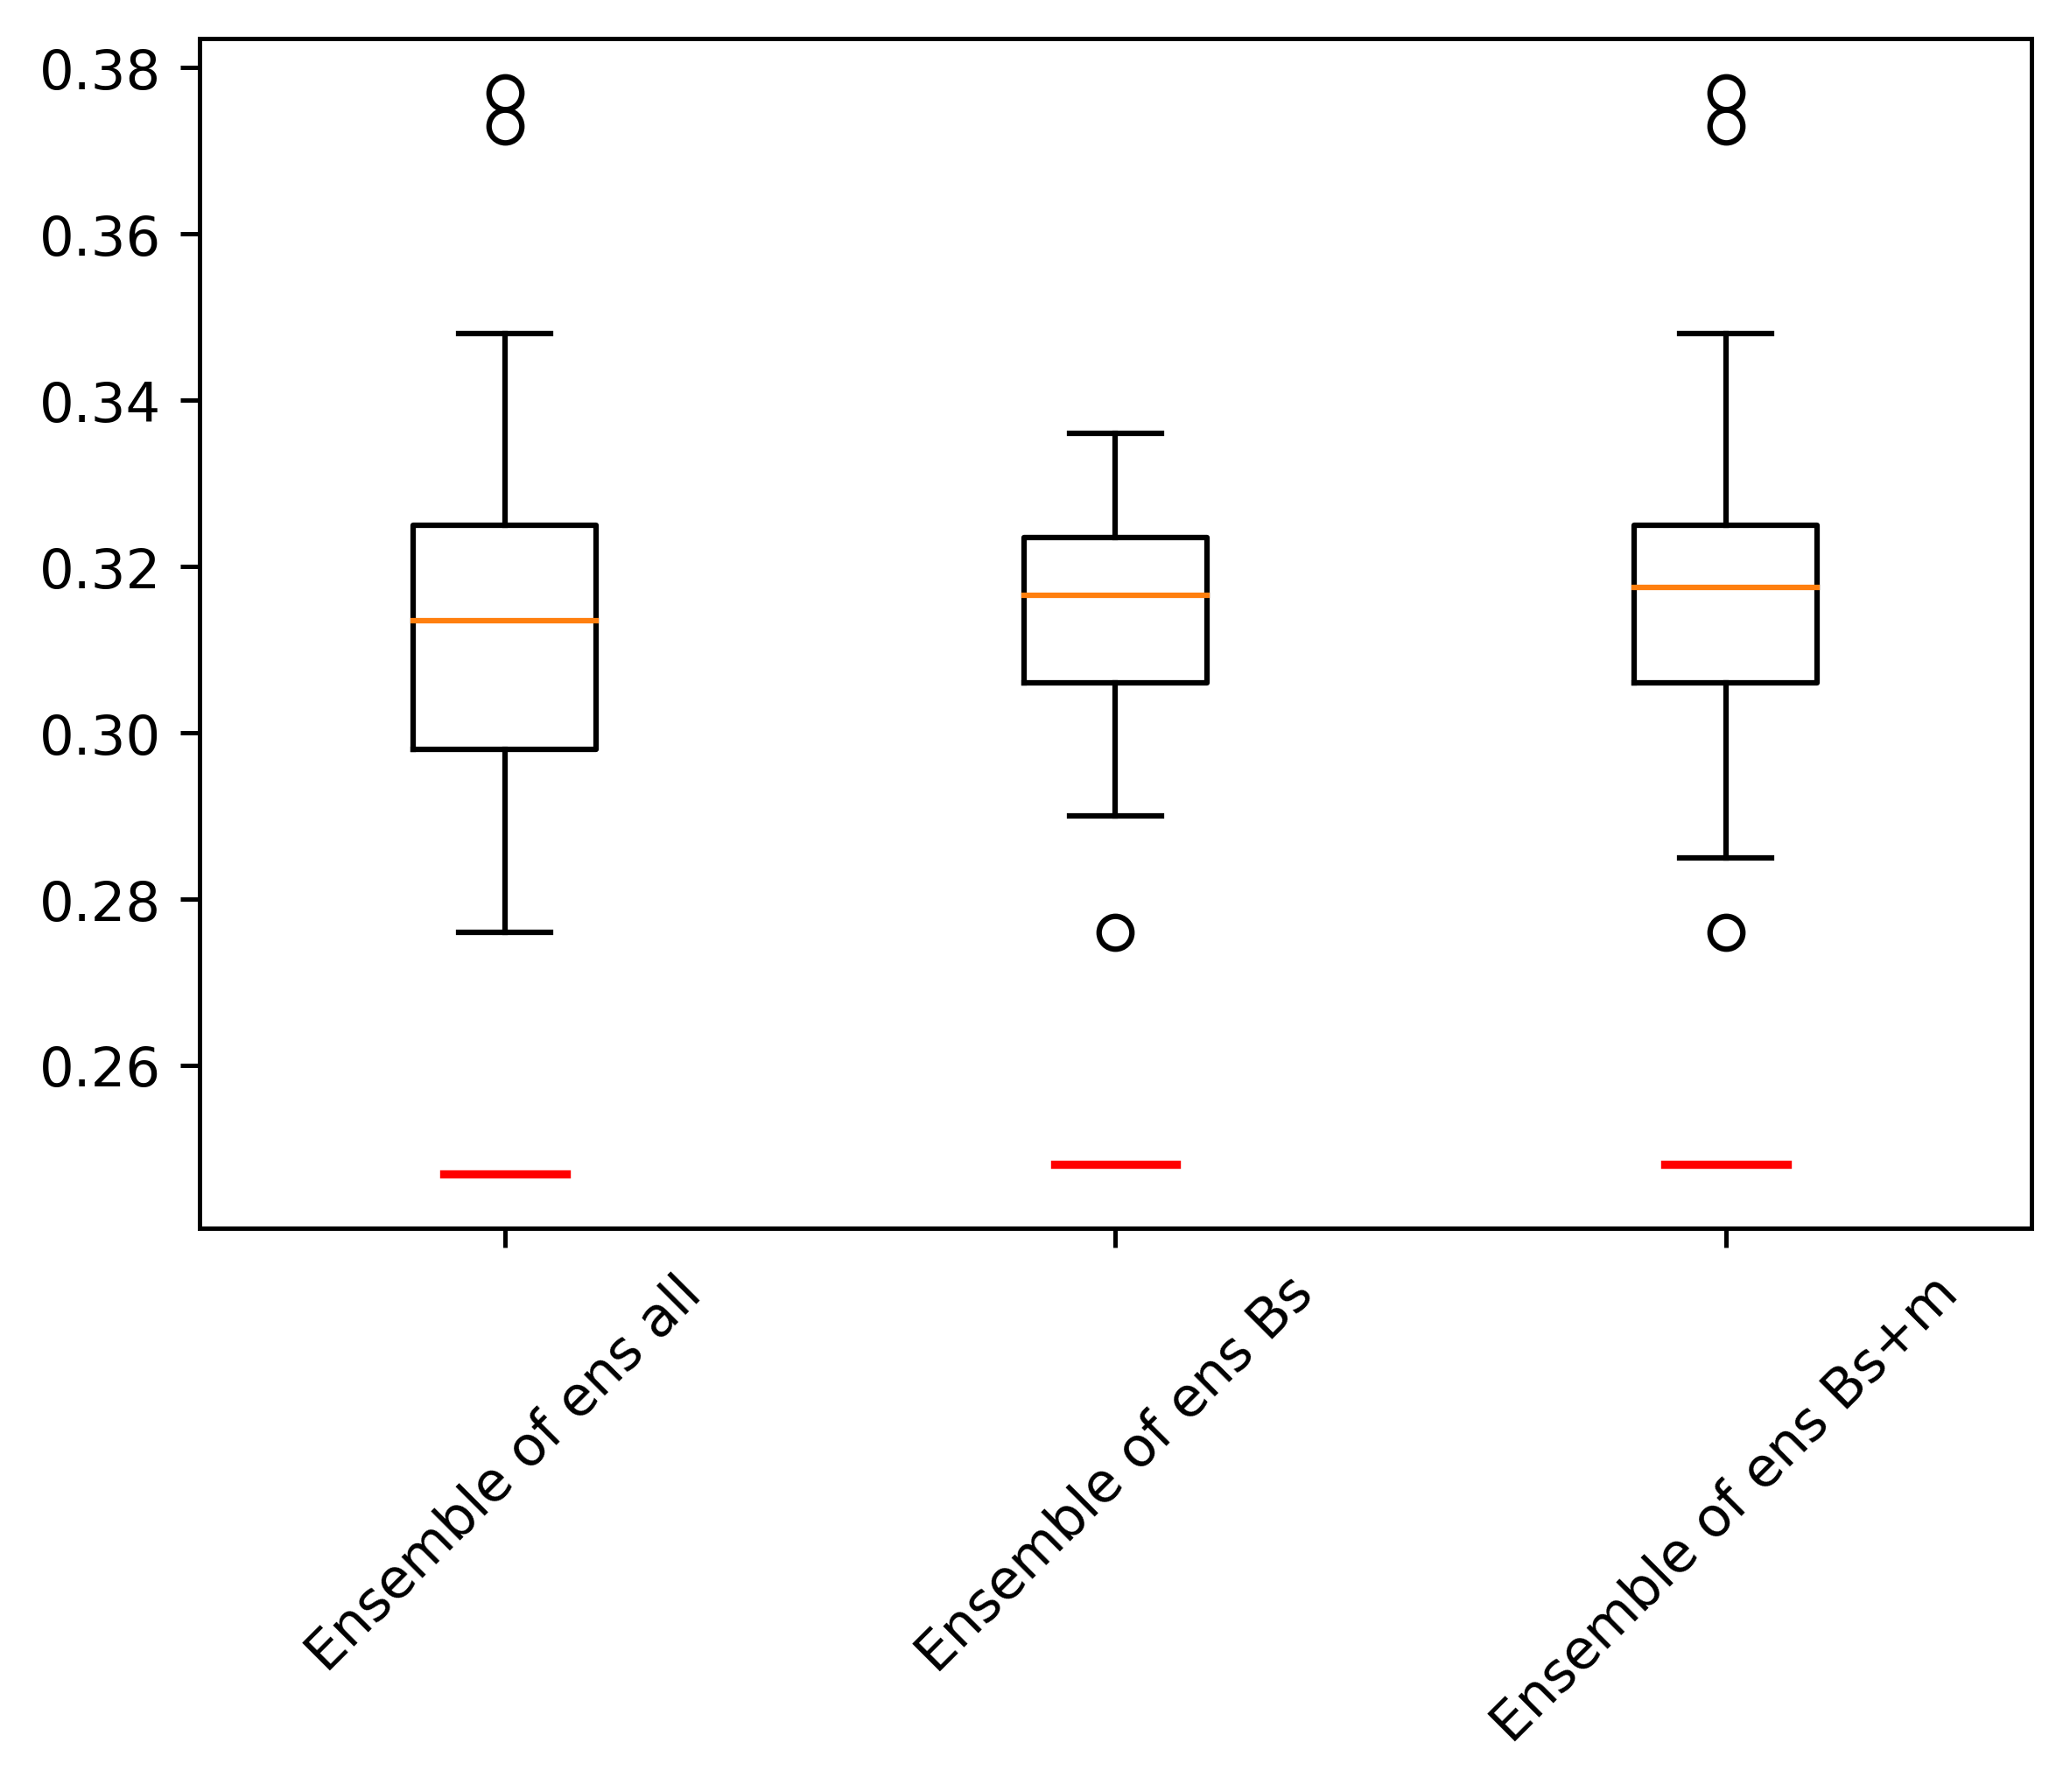

In [32]:
plt.boxplot([ens1_mse, ens2_mse, ens3_mse])
plt.plot([0.9, 1.1], [ens_all_mse,ens_all_mse], 'r')
plt.plot([1.9, 2.1], [ens_B_mse,ens_B_mse], 'r')
plt.plot([2.9, 3.1], [ens_Bm_mse,ens_Bm_mse], 'r')

plt.xticks(range(1,4), ['Ensemble of ens all', 'Ensemble of ens Bs', 'Ensemble of ens Bs+m'], rotation = 45)

plt.show()